# Resampling Datetime Data
- Kevin Barnett
-06/15/2023

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,6)

In [2]:
# Load data
df = pd.read_csv("\\Users\\hamma\\Documents\\GitHub\\Resampling-Datetime-Data\\london_weather_MODIFIED - london_weather_MODIFIED.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [3]:
# Convert date column to datetime dtype
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

In [4]:
# Set date column as index
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [5]:
# Filter out years from before 2000 and keep only these features:
# 'precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth'
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 
                      'snow_depth']]
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


In [6]:
# Impute any missing values
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [7]:
# Interpolating temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [8]:
df.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [9]:
# filling preciptation/snow with 0
df['precipitation'] = df['precipitation'].fillna(method='bfill')
df['snow_depth'] = df['snow_depth'].fillna(0)

In [10]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

## Question 1: What month had the most precipitation between 2000 through 2010?

In [11]:
precip_cols = ['precipitation','snow_depth']
df_2 = df.loc['2000':'2010', precip_cols]
df_2

,precipitation,snow_depth
date,,
2000-01-01,0.0,0.0
2000-01-02,0.2,0.0
2000-01-03,6.0,0.0
2000-01-04,0.2,0.0
2000-01-05,0.8,0.0
...,...,...
2010-12-27,5.0,1.0
2010-12-28,0.4,0.0
2010-12-29,1.4,0.0


In [12]:
# Resample to monthly frequency
df_2_ms = df_2.resample('MS').sum()
df_2_ms.name = 'resampled'
df_2_ms.head()

,precipitation,snow_depth
date,,
2000-01-01,14.7,0.0
2000-02-01,67.4,0.0
2000-03-01,14.2,0.0
2000-04-01,90.8,0.0
2000-05-01,87.4,0.0


In [13]:
# Create column with total precipitation
df_2_ms['total_precipitation'] =  df_2_ms['precipitation'] + df_2_ms['snow_depth']
df_2_ms.head()

,precipitation,snow_depth,total_precipitation
date,,,
2000-01-01,14.7,0.0,14.7
2000-02-01,67.4,0.0,67.4
2000-03-01,14.2,0.0,14.2
2000-04-01,90.8,0.0,90.8
2000-05-01,87.4,0.0,87.4


In [14]:
# Sort values in descending order to find month with most precipitation
df_2_sorted = df_2_ms.sort_values(by='total_precipitation', ascending=False)
df_2_sorted

,precipitation,snow_depth,total_precipitation
date,,,
2009-11-01,146.8,0.0,146.8
2002-11-01,145.6,0.0,145.6
2000-10-01,139.0,0.0,139.0
2002-12-01,119.0,0.0,119.0
2001-03-01,115.6,0.0,115.6
...,...,...,...
2000-03-01,14.2,0.0,14.2
2010-06-01,12.4,0.0,12.4
2003-08-01,10.4,0.0,10.4


> November 2009 was the month with the most precipitation

In [28]:
tp = df_2_ms['total_precipitation'].max()

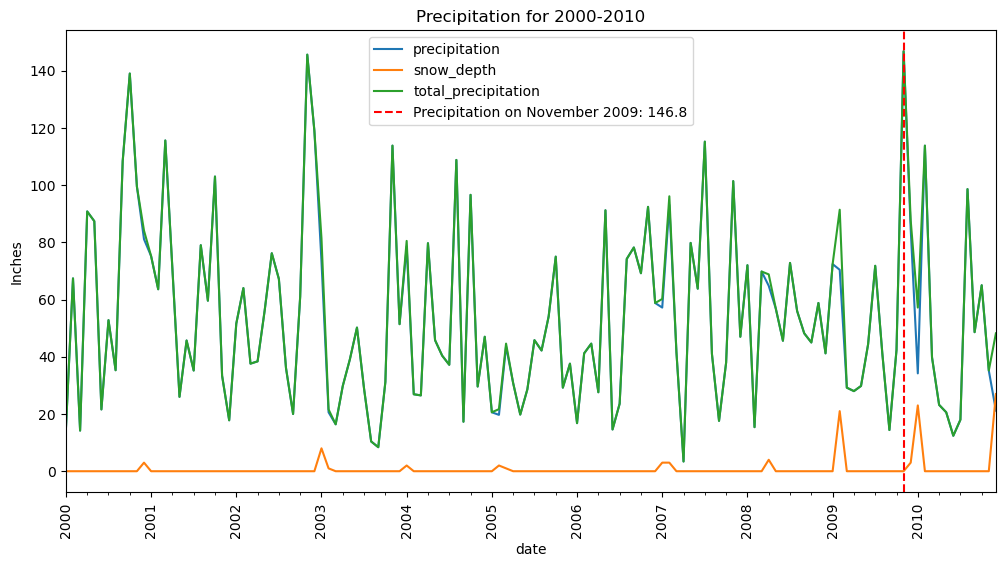

In [32]:
df_2_ms.plot()
plt.title('Precipitation for 2000-2010')
plt.ylabel('Inches')
plt.axvline(x='2009-11-01', color='r', ls='--', label = f'Precipitation on November 2009: {tp}')
plt.xticks(rotation=90)
plt.legend();

## Question 2: Which year between 2000-2020 had the coolest average temperature?

In [17]:
temp_col = ['mean_temp']
df_3 = df.loc['2000':'2020', temp_col]
df_3

,mean_temp
date,
2000-01-01,7.0
2000-01-02,7.9
2000-01-03,9.4
2000-01-04,7.0
2000-01-05,6.4
...,...
2020-12-27,7.5
2020-12-28,1.1
2020-12-29,2.6


In [18]:
# Resample to yearly frequency
df_3_as = df_3.resample('YS').mean()
df_3_as.name = 'resampled'
df_3_as.head()

,mean_temp
date,
2000-01-01,11.575683
2001-01-01,11.331507
2002-01-01,12.084247
2003-01-01,12.114521
2004-01-01,11.900683


In [19]:
# Sort by ascending values
df_3_as.sort_values(by='mean_temp')

,mean_temp
date,
2010-01-01,10.657397
2013-01-01,11.166301
2012-01-01,11.300956
2008-01-01,11.326776
2001-01-01,11.331507
2000-01-01,11.575683
2009-01-01,11.721644
2005-01-01,11.822877
2004-01-01,11.900683


> 2010 was the year with the coolest average temperature 

In [43]:
min_temp = df_3_as['mean_temp'].min()
min_temp

10.657397260273973

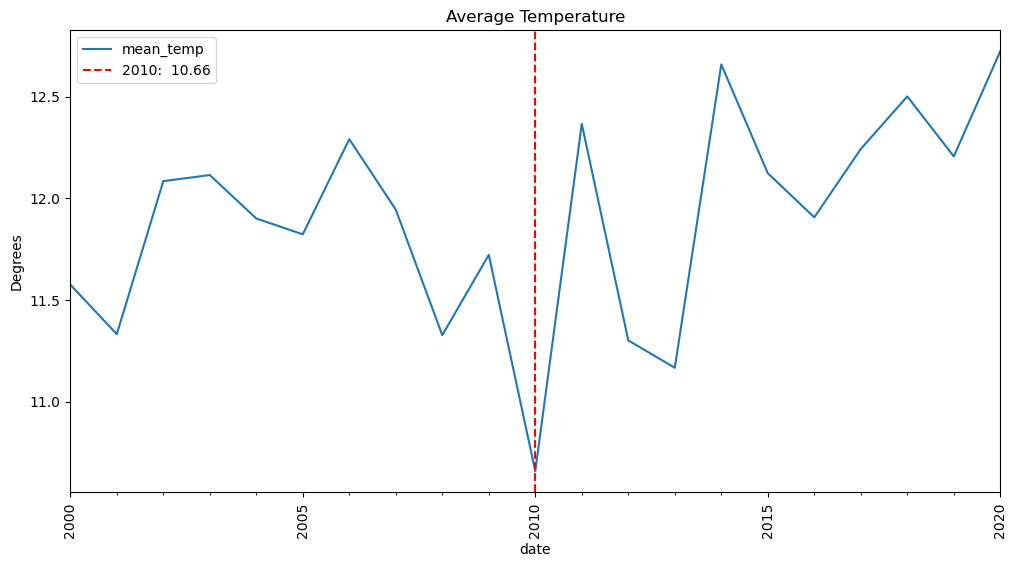

In [44]:
df_3_as.plot()
plt.title('Average Temperature')
plt.ylabel('Degrees')
plt.xticks(rotation=90)
plt.axvline(x='2010-01-01', color='r', ls='--', label = f'2010: {min_temp: .2f}')
plt.legend();